In [1]:
from cmb.configs.experiments import Configs
from cmb.datasets.jetclass import SampleCoupling
from cmb.dynamics.cfm import ConditionalFlowMatching

config = Configs('epic.yaml')
jets = SampleCoupling(config=config.data, standardize=False)
dynamics = ConditionalFlowMatching(config)

2024-09-22 18:16:44.488454: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-22 18:16:44.532298: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-22 18:16:44.533016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-22 18:16:45.216513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


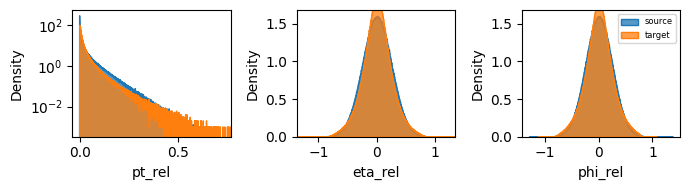

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(7,2))
jets.source.histplot('pt_rel', ax=ax[0], log_scale=(False,True), stat='density')
jets.target.histplot('pt_rel', ax=ax[0], log_scale=(False,True), stat='density')
jets.source.histplot('eta_rel', ax=ax[1], stat='density')
jets.target.histplot('eta_rel', ax=ax[1], stat='density')
jets.source.histplot('phi_rel', ax=ax[2], label='source', stat='density')
jets.target.histplot('phi_rel', ax=ax[2], label='target', stat='density')
ax[2].legend(fontsize=6)
plt.tight_layout()
plt.show()

(None, None)

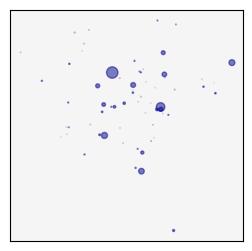

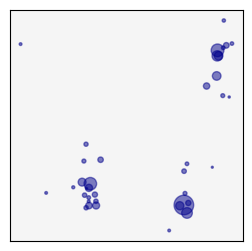

In [5]:
jets.source.display_cloud(idx=10,  scale_marker=100.0), jets.target.display_cloud(idx=10,  scale_marker=300.0)

In [ ]:
from cmb.models.trainers import CMBTrainer
from cmb.models.architectures.epic import EPiC
from cmb.dynamics.cfm import ConditionalFlowMatching

epic = EPiC(config)
dynamics = ConditionalFlowMatching(config)
generative_model = CMBTrainer(config, dynamics, epic, jets)
generative_model.train()


In [3]:
from cmb.models.pipelines import Pipeline
num_gen_jets = 1000
pipeline = Pipeline(config=config, trained_model=generative_model, dynamics=dynamics)
test = SampleCoupling(config.data)
pipeline.generate_samples(source_continuous=test.source.continuous[:num_gen_jets], mask=test.source.mask[:num_gen_jets])


# pipeline = Pipeline(config, model, dynamics)
# test = SampleCoupling(config=config.data)
# pipeline.generate_samples(source_continuous=test.source.continuous, source_discrete=test.source.discrete.unsqueeze(1))


/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


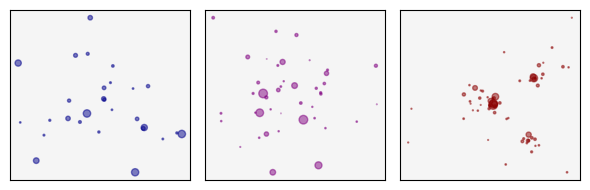

In [4]:
import torch
import matplotlib.pyplot as plt
from cmb.datasets.jetclass import ParticleClouds

generated = torch.cat([pipeline.paths[-1], test.source.mask[:num_gen_jets]], dim=-1)
jets_generated = ParticleClouds(generated) 

n=101
fig, ax = plt.subplots(1,3, figsize=(6,2))
jets.source.display_cloud(idx=n, scale_marker=100, ax=ax[0], color='darkblue')
jets_generated.display_cloud(idx=n, scale_marker=100, ax=ax[1], color='purple')
jets.target.display_cloud(idx=n, scale_marker=100, ax=ax[2], color='darkred')
plt.tight_layout()
plt.savefig(generative_model.workdir / 'particle_displays.png')
plt.show()

varying number of constituents (max. 128)

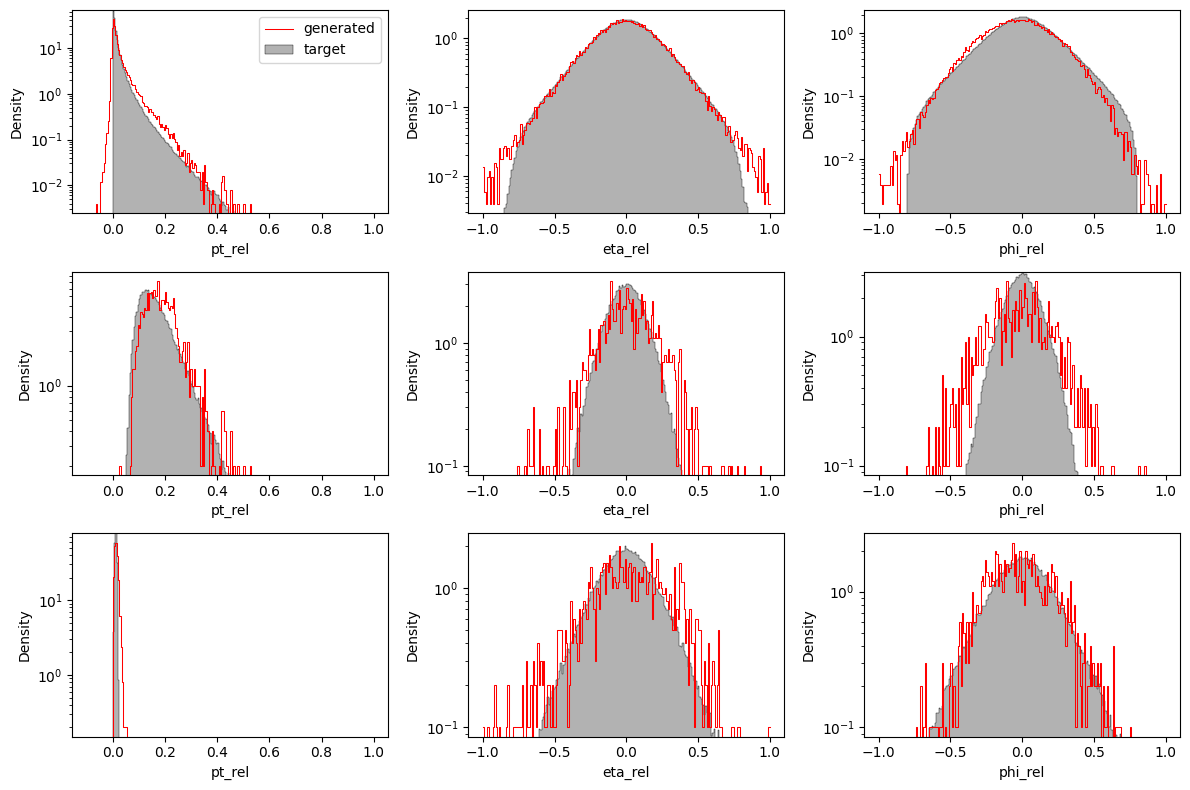

In [6]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(12,8))

binrange_0, binwidth_0 = (-0.1, 1), 0.005
binrange_1, binwidth_1 = (-1, 1), 0.01
binrange_2, binwidth_2 = (-1, 1), 0.01

jets_generated.histplot('pt_rel', binrange=binrange_0, binwidth=binwidth_0, ax=ax[0,0], color='r', log_scale=(False, True), fill=False, stat='density',lw=0.75, label='generated')
jets.target.histplot('pt_rel', binrange=binrange_0, binwidth=binwidth_0, ax=ax[0,0], log_scale=(False, True),  color='k', stat='density', alpha=0.3, lw=0.3, label='target')
jets_generated.histplot('eta_rel', binrange=binrange_1, binwidth=binwidth_1, ax=ax[0,1], log_scale=(False, True), color='r', fill=False, stat='density', lw=0.75, label='generated')
jets.target.histplot('eta_rel', binrange=binrange_1, binwidth=binwidth_1, ax=ax[0,1],   log_scale=(False, True), color='k', stat='density', alpha=0.3, lw=0.3, label='target')
jets_generated.histplot('phi_rel', binrange=binrange_2, binwidth=binwidth_2, ax=ax[0,2], log_scale=(False, True), color='r', fill=False, stat='density',  lw=0.75, label='generated')
jets.target.histplot('phi_rel',binrange=binrange_2, binwidth=binwidth_2, ax=ax[0,2],  log_scale=(False, True), color='k', stat='density', alpha=0.3, lw=0.3, label='target')

jets_generated.histplot('pt_rel', idx=0, binrange=binrange_0, binwidth=binwidth_0, ax=ax[1,0], color='r', log_scale=(False, True), fill=False, stat='density',lw=0.75, label='generated')
jets.target.histplot('pt_rel', idx=0, binrange=binrange_0, binwidth=binwidth_0, ax=ax[1,0], log_scale=(False, True),  color='k', stat='density', alpha=0.3, lw=0.3, label='target')
jets_generated.histplot('eta_rel', idx=0, binrange=binrange_1, binwidth=binwidth_1, ax=ax[1,1], log_scale=(False, True), color='r', fill=False, stat='density', lw=0.75, label='generated')
jets.target.histplot('eta_rel', idx=0, binrange=binrange_1, binwidth=binwidth_1, ax=ax[1,1],   log_scale=(False, True), color='k', stat='density', alpha=0.3, lw=0.3, label='target')
jets_generated.histplot('phi_rel', idx=0, binrange=binrange_2, binwidth=binwidth_2, ax=ax[1,2], log_scale=(False, True), color='r', fill=False, stat='density',  lw=0.75, label='generated')
jets.target.histplot('phi_rel', idx=0, binrange=binrange_2, binwidth=binwidth_2, ax=ax[1,2],  log_scale=(False, True), color='k', stat='density', alpha=0.3, lw=0.3, label='target')

jets_generated.histplot('pt_rel', idx=20, binrange=binrange_0, binwidth=binwidth_0, ax=ax[2,0], color='r', log_scale=(False, True), fill=False, stat='density',lw=0.75, label='generated')
jets.target.histplot('pt_rel', idx=20, binrange=binrange_0, binwidth=binwidth_0, ax=ax[2,0], log_scale=(False, True),  color='k', stat='density', alpha=0.3, lw=0.3, label='target')
jets_generated.histplot('eta_rel', idx=20, binrange=binrange_1, binwidth=binwidth_1, ax=ax[2,1], log_scale=(False, True), color='r', fill=False, stat='density', lw=0.75, label='generated')
jets.target.histplot('eta_rel', idx=20, binrange=binrange_1, binwidth=binwidth_1, ax=ax[2,1],   log_scale=(False, True), color='k', stat='density', alpha=0.3, lw=0.3, label='target')
jets_generated.histplot('phi_rel', idx=20, binrange=binrange_2, binwidth=binwidth_2, ax=ax[2,2], log_scale=(False, True), color='r', fill=False, stat='density',  lw=0.75, label='generated')
jets.target.histplot('phi_rel', idx=20, binrange=binrange_2, binwidth=binwidth_2, ax=ax[2,2],  log_scale=(False, True), color='k', stat='density', alpha=0.3, lw=0.3, label='target')

ax[0,0].legend()
plt.tight_layout()
plt.savefig(generative_model.workdir / 'particle_distributions.png')
plt.show()
